In [171]:
%matplotlib notebook
import pandas as pd
#from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [188]:
country_data = "/Users/shilpa/Desktop/Boringppl_project/WasteManagement/Data/country_level_data_0.csv"
country_data_df = pd.read_csv(country_data, encoding = 'utf-8')
#country_data_df


In [191]:
Treatment = country_data_df[['country_name', 
                             'income_id',
                       'waste_treatment_anaerobic_digestion_percent',
                       'waste_treatment_compost_percent',
                       'waste_treatment_controlled_landfill_percent',
                       'waste_treatment_incineration_percent',
                       'waste_treatment_landfill_unspecified_percent',
                       'waste_treatment_open_dump_percent', 
                       'waste_treatment_other_percent',
                       'waste_treatment_recycling_percent',
                       'waste_treatment_sanitary_landfill_landfill_gas_system_percent',
                       'waste_treatment_unaccounted_for_percent',
                       'waste_treatment_waterways_marine_percent']]
Treatment.fillna(0).set_index('country_name')

,income_id,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent
country_name,,,,,,,,,,,,
Aruba,HIC,0,0,0,0,0,0,0,11,0,89,0
Afghanistan,LIC,0,0,0,0,0,0,0,0,0,0,0
Angola,LMC,0,0,0,0,0,0,0,0,0,0,0
Albania,UMC,0,0,0,0,0,0,0,0,0,0,0
Andorra,HIC,0,0,0,52,0,0,0,0,0,48,0
United Arab Emirates,HIC,0,9,0,0,9,62,0,20,0,0,0
Argentina,HIC,0,0,9,0,0,23,0,6,62,0,0
Armenia,UMC,0,0,0,0,0,100,0,0,0,0,0
American Samoa,UMC,0,0,0,0,0,0,0,0,0,0,0


In [192]:

# a = country_data_df.rename(columns={'country_name':'Country', 
#                        'income_id':'Income', 
#                        'gdp': 'GDP', 
#                        'population_population_number_of_people': 'Population', 
#                        'total_msw_total_msw_generated_tons_year': 'Total_MSW_year',
#                        'waste_treatment_anaerobic_digestion_percent': 'Percent_Anaerobic',
#                        'waste_treatment_compost_percent':'Percent_Compost',
#                        'waste_treatment_controlled_landfill_percent': 'Percent_Controlled_Landfill',
#                        'waste_treatment_incineration_percent': 'Percent_Incineration',
#                        'waste_treatment_landfill_unspecified_percent': 'Percent_Unspecified_Landfill',
#                        'waste_treatment_open_dump_percent': 'Percent_OpenDump', 
#                        'waste_treatment_other_percent': 'Percent_Misc',
#                        'waste_treatment_recycling_percent': 'Percent_Recycling',
#                        'waste_treatment_sanitary_landfill_landfill_gas_system_percent': 'Percent_landfill_gas',
#                        'waste_treatment_unaccounted_for_percent': 'Percent_Unaccounted',
#                        'waste_treatment_waterways_marine_percent': 'Percent_marine'})

# a
# Treatment = a.fillna(0).set_index('Country')

# Americas Waste Treatment

In [260]:
#Get North and South American countries
Northern_America = Treatment.loc[country_data_df['country_name'].
            isin(['Canada', 'Greenland', 'Mexico', 'United States'])].set_index('country_name')

Caribbean = Treatment.loc[country_data_df['country_name'] .\
            isin(['Anguilla', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Bermuda', 
                  'British Virgin Islands', 'Cayman Islands', 'Cuba', 'Curacao', 'Dominica', 'Dominican Republic',
                  'Grenada', 'Guadeloupe', 'Haiti', 'Jamaica', 'Martinique', 'Montserrat', 'Puerto Rico', 
                  'St. Kitts and Nevis', 'St. Lucia', 'St. Vincent and the Grenadines', 
                  'Trinidad and Tobago', 'Virgin Islands (U.S.)'])].set_index('country_name')


Central_America = Treatment.loc[country_data_df['country_name'] .\
             isin(['Belize', 'Costa Rica', 'El Salvador', 'Guetamala', 'Honduras', 'Nicaragua', 'Panama'])].set_index('country_name')


South_America = Treatment.loc[country_data_df['country_name'] .\
             isin(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Columbia', 'Eucador', 'French Guiana(France)', 'Guyana',
                  'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuala'])].set_index('country_name')


Americas = [Northern_America, Caribbean, Central_America, South_America]
df_Americas = pd.concat(Americas)
df_Americas.fillna(0)

##LIC
treatment_LIC = df_Americas.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates()
LIC_Americas_summary = treatment_LIC.sum(axis=0).fillna(0)

LIC =  pd.DataFrame(LIC_Americas_summary)
LIC.reset_index()
LIC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
LIC.index.names = ['Treatment']
LIC.reset_index().T

#LMC
treatment_LMC = df_Americas.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates()
LMC_Americas_summary = treatment_LMC.sum(axis=0).fillna(0)

LMC =  pd.DataFrame(LMC_Americas_summary)
LMC.reset_index()
LMC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
LMC.index.names = ['Treatment']
LMC.reset_index().T

#UMC
treatment_UMC = df_Americas.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates()
UMC_Americas_summary = treatment_UMC.sum(axis=0).fillna(0)

UMC =  pd.DataFrame(UMC_Americas_summary)
UMC.reset_index()
UMC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
UMC.index.names = ['Treatment']
UMC.reset_index().T

#HIC
treatment_HIC = df_Americas.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates()
HIC_Americas_summary = treatment_HIC.sum(axis=0).fillna(0)

HIC =  pd.DataFrame(HIC_Americas_summary)
HIC.reset_index()
HIC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
HIC.index.names = ['Treatment']
HIC.reset_index().T


# Concat LIC, UMC and HIC
Americas = pd.concat([LIC, LMC, UMC, HIC], axis=1)
Americas

#Rename Treatment column, drop income_id
Americas.columns=['LIC', 'LMC', 'UMC', 'HIC']
a = Americas.drop(['income_id'])
z = a.T
df=z.rename(columns = {'waste_treatment_anaerobic_digestion_percent':'Anaerobic digestion',
                      'waste_treatment_compost_percent': 'Compost',
                      'waste_treatment_controlled_landfill_percent': 'Controlled landfill',
                      'waste_treatment_incineration_percent':'Incineration',
                      'waste_treatment_landfill_unspecified_percent':'Landfill unspecified',
                      'waste_treatment_open_dump_percent':'Open dump',
                      'waste_treatment_other_percent':'Other',
                      'waste_treatment_recycling_percent':'Recycling',
                      'waste_treatment_sanitary_landfill_landfill_gas_system_percent':'Sanitary & landfill & gas',
                      'waste_treatment_unaccounted_for_percent':'Unaccounted',
                      'waste_treatment_waterways_marine_percent':'Waterways & marine'})
b = df.T
b


,LIC,LMC,UMC,HIC
Treatment,,,,
Anaerobic digestion,0,0,0,0
Compost,0,0,1,24
Controlled landfill,10,60,485,485
Incineration,0,0,0,204
Landfill unspecified,0,20,161,251
Open dump,0,144,369,156
Other,0,29,37,19
Recycling,0,12,30,129
Sanitary & landfill & gas,0,121,290,115


<IPython.core.display.Javascript object>


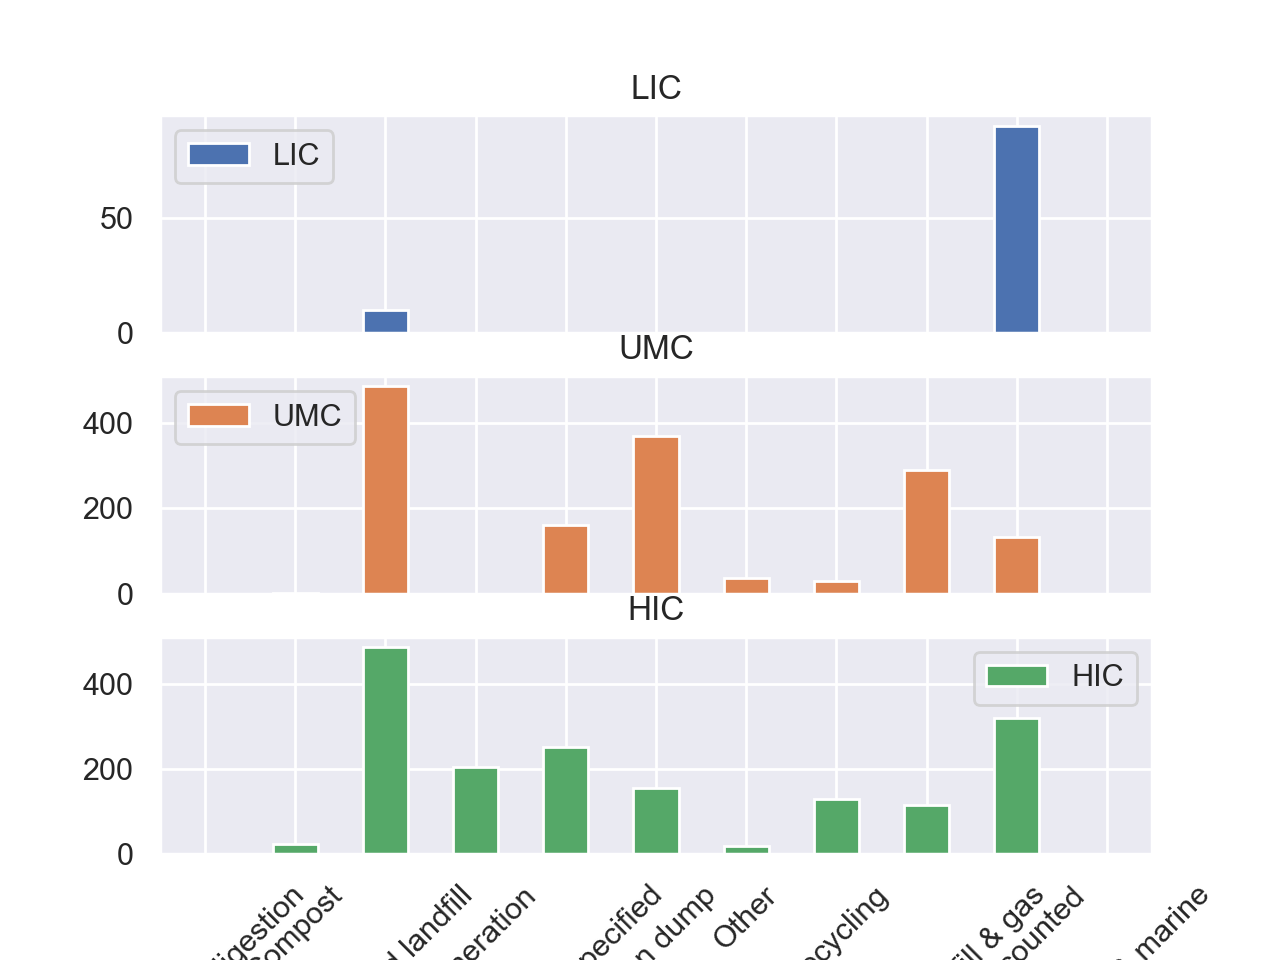

In [222]:
axes = df.plot.bar(rot=45, subplots=True)
>>> axes[1].legend(loc=2)  

# Africas Waste Treatment

In [261]:
# Get Afican countries, fillna(0)
North_Africa = Treatment.loc[country_data_df['country_name'].isin(['Algeria', "Egypt, Arab Rep.", 
              "Libya", "Sudan", "Tunisia"])].set_index('country_name')
North_Africa

West_Africa = Treatment.loc[country_data_df['country_name'] .\
            isin(['Benin', "Burkina Faso", "Cape Verde", "Côte d’Ivoire", "Gambia,The", "Ghana", 
                  "Guinea", "Guinea Bissau", "Liberia", "Mali", "Mauritania", "Niger", "Nigeria", 
                  "Senegal", "Sierra Leone","Togo"])].set_index('country_name')

Central_Africa = Treatment.loc[country_data_df['country_name'] .\
            isin(['Angola', "Camaroon", "Central African Republic", "Chad", "Congo, Rep.", "Congo, Dem. Rep.", 
                  "Equatorial Guinea", "Gabon", "São Tomé and Príncipe"])].set_index('country_name')

East_Africa = Treatment.loc[country_data_df['country_name'] .\
            isin(['Burundi', "Comaros", "Djibouti", "Eritrea", "Ethiopia", "Kenya", "Madagascar", "Malawi", 
                  "Mauritius", "Mozambique", "Rwanda", "Seychelles", "Somalia", "Somaliland", "South Sudan", 
                  "Tanzania", "Uganda", "Zambia", "Zimbabwe"])].set_index('country_name')


Southern_Africa = Treatment.loc[country_data_df['country_name'] .\
            isin(['Botswana', "Lesotho", "Namibia", "South Africa", "Swaziland"])].set_index('country_name')

Africa = [North_Africa, West_Africa, Central_Africa, East_Africa, Southern_Africa]
df_Africa = pd.concat(Africa)
df_Africa.fillna(0)


##LIC
treatment_LIC = df_Africa.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates()
LIC_Africa_summary = treatment_LIC.sum(axis=0).fillna(0)

LIC =  pd.DataFrame(LIC_Africa_summary)
LIC.reset_index()
LIC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
LIC.index.names = ['Treatment']
LIC.reset_index().T

#LMC
treatment_LMC = df_Africa.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates()
LMC_Africa_summary = treatment_LMC.sum(axis=0).fillna(0)

LMC =  pd.DataFrame(LMC_Africa_summary)
LMC.reset_index()
LMC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
LMC.index.names = ['Treatment']
LMC.reset_index().T

#UMC
treatment_UMC = df_Africa.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates()
UMC_Africa_summary = treatment_UMC.sum(axis=0).fillna(0)

UMC =  pd.DataFrame(UMC_Africa_summary)
UMC.reset_index()
UMC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
UMC.index.names = ['Treatment']
UMC.reset_index().T

#HIC
treatment_HIC = df_Africa.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates()
HIC_Africa_summary = treatment_HIC.sum(axis=0).fillna(0)

HIC =  pd.DataFrame(HIC_Africa_summary)
HIC.reset_index()
HIC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
HIC.index.names = ['Treatment']
HIC.reset_index().T


# Concat LIC, UMC and HIC
Africa = pd.concat([LIC, LMC, UMC, HIC], axis=1)
Africa

#Rename Treatment column, drop income_id
Africa.columns=['LIC', 'LMC', 'UMC', 'HIC']
a = Africa.drop(['income_id'])
z = a.T
df=z.rename(columns = {'waste_treatment_anaerobic_digestion_percent':'Anaerobic digestion',
                      'waste_treatment_compost_percent': 'Compost',
                      'waste_treatment_controlled_landfill_percent': 'Controlled landfill',
                      'waste_treatment_incineration_percent':'Incineration',
                      'waste_treatment_landfill_unspecified_percent':'Landfill unspecified',
                      'waste_treatment_open_dump_percent':'Open dump',
                      'waste_treatment_other_percent':'Other',
                      'waste_treatment_recycling_percent':'Recycling',
                      'waste_treatment_sanitary_landfill_landfill_gas_system_percent':'Sanitary & landfill & gas',
                      'waste_treatment_unaccounted_for_percent':'Unaccounted',
                      'waste_treatment_waterways_marine_percent':'Waterways & marine'})
b = df.T
b

,LIC,LMC,UMC,HIC
Treatment,,,,
Anaerobic digestion,0,0,0,0
Compost,5,12,10,0
Controlled landfill,5,37,74,0
Incineration,0,0,0,0
Landfill unspecified,17,199,0,0
Open dump,658,160,0,0
Other,39,78,0,0
Recycling,76,62,42,0
Sanitary & landfill & gas,7,0,180,0


# Asia Waste Treatment

In [257]:
# Get Afican countries, fillna(0)
North_Asia = Treatment.loc[country_data_df['country_name'].isin(['Russia', 'Siberia'])].set_index('country_name')

West_Asia = Treatment.loc[country_data_df['country_name'] .\
            isin(['Armenia', 'Azerbaijan', 'Bahrain', 'Cyprus', 'Georgia','Iran', 'Iraq', 'Israel', 
                  'Jordan','Kuwait', 'Lebanon', 'Omar', 'Qatar', 'Saudi Arabia', 'State of Palestine', 
                  'Turkey', 'United Arab Emirates', 'Yemen'])].set_index('country_name')

Central_Asia = Treatment.loc[country_data_df['country_name'] .\
            isin(['Afghanistan', 'Khazakstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 
                    'Uzbekistan'])].set_index('country_name')

East_Asia = Treatment.loc[country_data_df['country_name'] .\
            isin(['China', 'Hong Kong SAR, China', 'Macao SAR, China', 'Japan', 'Korea(North)', 'Korea(South)',
                 'Mongolia', 'Taiwan', 'Korea, Rep.'])].set_index('country_name')


South_Asia = Treatment.loc[country_data_df['country_name'] .\
            isin(['Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Srilanka'])].set_index('country_name')

Southeast_Asia = Treatment.loc[country_data_df['country_name'] .\
            isin(['Brunei Darussalam', 'Cambodia', 'Indonesia', 'Lao PDR', 'Malaysia', 'Myanmar', 'Phillipiness',
                  'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam'])].set_index('country_name')
Southeast_Asia


Asia = [North_Asia, West_Asia, Central_Asia, East_Asia, South_Asia, Southeast_Asia]
df_Asia = pd.concat(Asia)
df_Asia.fillna(0)


##LIC
treatment_LIC = df_Asia.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates()
LIC_Asia_summary = treatment_LIC.sum(axis=0).fillna(0)

LIC =  pd.DataFrame(LIC_Asia_summary)
LIC.reset_index()
LIC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
LIC.index.names = ['Treatment']
LIC.reset_index().T

#LMC
treatment_LMC = df_Asia.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates()
LMC_Asia_summary = treatment_LMC.sum(axis=0).fillna(0)

LMC =  pd.DataFrame(LMC_Asia_summary)
LMC.reset_index()
LMC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
LMC.index.names = ['Treatment']
LMC.reset_index().T


#UMC
treatment_UMC = df_Asia.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates()
UMC_Asia_summary = treatment_UMC.sum(axis=0).fillna(0)

UMC =  pd.DataFrame(UMC_Asia_summary)
UMC.reset_index()
UMC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
UMC.index.names = ['Treatment']
UMC.reset_index().T

#HIC
treatment_HIC = df_Asia.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates()
HIC_Asia_summary = treatment_HIC.sum(axis=0).fillna(0)

HIC =  pd.DataFrame(HIC_Asia_summary)
HIC.reset_index()
HIC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
HIC.index.names = ['Treatment']
HIC.reset_index().T


# Concat LIC, UMC and HIC
Asia = pd.concat([LIC, LMC, UMC, HIC], axis=1)
Asia

#Rename Treatment column, drop income_id
Asia.columns=['LIC', 'LMC', 'UMC', 'HIC']
a = Asia.drop(['income_id'])
z = a.T
df=z.rename(columns = {'waste_treatment_anaerobic_digestion_percent':'Anaerobic digestion',
                      'waste_treatment_compost_percent': 'Compost',
                      'waste_treatment_controlled_landfill_percent': 'Controlled landfill',
                      'waste_treatment_incineration_percent':'Incineration',
                      'waste_treatment_landfill_unspecified_percent':'Landfill unspecified',
                      'waste_treatment_open_dump_percent':'Open dump',
                      'waste_treatment_other_percent':'Other',
                      'waste_treatment_recycling_percent':'Recycling',
                      'waste_treatment_sanitary_landfill_landfill_gas_system_percent':'Sanitary & landfill & gas',
                      'waste_treatment_unaccounted_for_percent':'Unaccounted',
                      'waste_treatment_waterways_marine_percent':'Waterways & marine'})
b = df.T
b

,LIC,LMC,UMC,HIC
Treatment,,,,
Anaerobic digestion,0,0,0,0
Compost,3,42,27,17
Controlled landfill,0,128,48,86
Incineration,0,0,36,146
Landfill unspecified,37,109,307,427
Open dump,100,350,280,162
Other,0,40,24,13
Recycling,0,54,52,262
Sanitary & landfill & gas,0,0,64,70


# Europe Waste Treatment

In [263]:
Northern_Europe = Treatment.loc[country_data_df['country_name'].
            isin(['Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'Greenland', 'Iceland', 'Ireland', 'Latvia', 
                  'Lithuania', 'Norway', 'Sweden', 'United Kingdom'])].set_index('country_name')


### Run these !!!!!!!
Western_Europe = Treatment.loc[country_data_df['country_name'] .\
            isin(['Austria', 'Belgium', 'France', 'Germany', 'Liechtenstein', 'Luxembourg', 'Netherlands', 
                   'Switzerland'])].set_index('country_name')


Eastern_Europe = Treatment.loc[country_data_df['country_name'] .\
                isin(['Belarus', 'Bulgaria', 'Czech Republic', 'Hungary', 'Moldova', 'Poland', 'Romania',
                 'Russian Federation', 'Slovak Republic', 'Ukraine'])].set_index('country_name')

Southern_Europe = Treatment.loc[country_data_df['country_name'] .\
               isin(['Albania', 'Andorra', 'Bosnia and Herzegovina', 'Croatia', 'Cyprus', 'Gibraltar',
                    'Greece', 'Italy', 'Kosovo', 'Macedonia, FYR', 'Malta', 'Monaco', 'Montenegro',
                    'Portugal', 'San Marino', 'Serbia', 'Slovenia', 'Spain', 'Turkey', 'Vatican City State'])].set_index('country_name')

Europe = [Northern_Europe, Western_Europe, Eastern_Europe, Southern_Europe]
df_Europe = pd.concat(Europe)
df_Europe.fillna(0)


# #LIC
# treatment_LIC = df_Europe.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates()
# LIC_Europe_summary = treatment_LIC.sum(axis=0).fillna(0)

# LIC =  pd.DataFrame(LIC_Europe_summary)
# LIC.reset_index()
# LIC.rename(columns={0:'Percent'}, inplace=True)
# pd.options.display.float_format = '{:,.0f}'.format
# LIC.index.names = ['Treatment']
# LIC.reset_index().T

#LMC
treatment_LMC = df_Europe.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates()
LMC_Europe_summary = treatment_LIC.sum(axis=0).fillna(0)

LMC =  pd.DataFrame(LMC_Europe_summary)
LMC.reset_index()
LMC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
LMC.index.names = ['Treatment']
LMC.reset_index().T

#UMC
treatment_UMC = df_Europe.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates()
UMC_Europe_summary = treatment_UMC.sum(axis=0).fillna(0)

UMC =  pd.DataFrame(UMC_Europe_summary)
UMC.reset_index()
UMC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
UMC.index.names = ['Treatment']
UMC.reset_index().T

#HIC
treatment_HIC = df_Europe.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates()
HIC_Europe_summary = treatment_HIC.sum(axis=0).fillna(0)

HIC =  pd.DataFrame(HIC_Europe_summary)
HIC.reset_index()
HIC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
HIC.index.names = ['Treatment']
HIC.reset_index().T


# Concat LIC, UMC and HIC
Europe = pd.concat([LMC, UMC, HIC], axis=1)
Europe

#Rename Treatment column, drop income_id
Europe.columns=['LMC', 'UMC', 'HIC']
a = Europe.drop(['income_id'])
z = a.T
df=z.rename(columns = {'waste_treatment_anaerobic_digestion_percent':'Anaerobic digestion',
                      'waste_treatment_compost_percent': 'Compost',
                      'waste_treatment_controlled_landfill_percent': 'Controlled landfill',
                      'waste_treatment_incineration_percent':'Incineration',
                      'waste_treatment_landfill_unspecified_percent':'Landfill unspecified',
                      'waste_treatment_open_dump_percent':'Open dump',
                      'waste_treatment_other_percent':'Other',
                      'waste_treatment_recycling_percent':'Recycling',
                      'waste_treatment_sanitary_landfill_landfill_gas_system_percent':'Sanitary & landfill & gas',
                      'waste_treatment_unaccounted_for_percent':'Unaccounted',
                      'waste_treatment_waterways_marine_percent':'Waterways & marine'})
b = df.T
b

,LMC,UMC,HIC
Treatment,,,
Anaerobic digestion,0,0,0
Compost,5,19,358
Controlled landfill,5,85,48
Incineration,0,5,895
Landfill unspecified,17,312,894
Open dump,658,279,0
Other,39,0,12
Recycling,76,52,875
Sanitary & landfill & gas,7,78,93


# Oceania Waste Treatment

In [268]:
Australia_NZ = Treatment.loc[country_data_df['country_name'].
            isin(['Australia', 'New Zealand'])].set_index('country_name')


Melanesia = Treatment.loc[country_data_df['country_name'] .\
            isin(['Fiji', 'New Caledonia', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu'])].set_index('country_name')

Micronesia = Treatment.loc[country_data_df['country_name'] .\
              isin(['Guam', 'Kiribati', 'Marshall Islands', 'Micronesia, Fed. Sts.', 'Nauru',
                    'Northern Mariana Islands', 'Palau'])].set_index('country_name')

Polynesia = Treatment.loc[country_data_df['country_name'] .\
              isin(['American Samoa', 'Cook Islands', 'Easter Island', 'French Polynesia', 'Hawaii',
                   'Niue', 'Pitcairin', 'Samoa', 'Tonga', 'Tuvalu'])].set_index('country_name')

Oceania= [Australia_NZ, Melanesia, Micronesia, Polynesia]
df_Oceania = pd.concat(Oceania)
df_Oceania.fillna(0)


# #LIC
# treatment_LIC = df_Oceania.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates()
# LIC_Oceania_summary = treatment_LIC.sum(axis=0).fillna(0)

# LIC =  pd.DataFrame(LIC_Oceania_summary)
# LIC.reset_index()
# LIC.rename(columns={0:'Percent'}, inplace=True)
# pd.options.display.float_format = '{:,.0f}'.format
# LIC.index.names = ['Treatment']
# LIC.reset_index().T

#LMC
treatment_LMC = df_Oceania.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates()
LMC_Oceania_summary = treatment_LMC.sum(axis=0).fillna(0)

LMC =  pd.DataFrame(LMC_Oceania_summary)
LMC.reset_index()
LMC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
LMC.index.names = ['Treatment']
LMC.reset_index().T

#UMC
treatment_UMC = df_Oceania.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates()
UMC_Oceania_summary = treatment_UMC.sum(axis=0).fillna(0)

UMC =  pd.DataFrame(UMC_Oceania_summary)
UMC.reset_index()
UMC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
UMC.index.names = ['Treatment']
UMC.reset_index().T

#HIC
treatment_HIC = df_Oceania.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates()
HIC_Oceania_summary = treatment_HIC.sum(axis=0).fillna(0)

HIC =  pd.DataFrame(HIC_Oceania_summary)
HIC.reset_index()
HIC.rename(columns={0:'Percent'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
HIC.index.names = ['Treatment']
HIC.reset_index().T


# Concat LIC, UMC and HIC
Oceania = pd.concat([LMC, UMC, HIC], axis=1)
Oceania

#Rename Treatment column, drop income_id
Oceania.columns=['LMC', 'UMC', 'HIC']
a = Oceania.drop(['income_id'])
z = a.T
df=z.rename(columns = {'waste_treatment_anaerobic_digestion_percent':'Anaerobic digestion',
                      'waste_treatment_compost_percent': 'Compost',
                      'waste_treatment_controlled_landfill_percent': 'Controlled landfill',
                      'waste_treatment_incineration_percent':'Incineration',
                      'waste_treatment_landfill_unspecified_percent':'Landfill unspecified',
                      'waste_treatment_open_dump_percent':'Open dump',
                      'waste_treatment_other_percent':'Other',
                      'waste_treatment_recycling_percent':'Recycling',
                      'waste_treatment_sanitary_landfill_landfill_gas_system_percent':'Sanitary & landfill & gas',
                      'waste_treatment_unaccounted_for_percent':'Unaccounted',
                      'waste_treatment_waterways_marine_percent':'Waterways & marine'})
b = df.T
b

,LMC,UMC,HIC
Treatment,,,
Anaerobic digestion,0,0,0
Compost,0,6,0
Controlled landfill,62,31,0
Incineration,0,0,10
Landfill unspecified,0,92,149
Open dump,11,14,0
Other,37,0,0
Recycling,39,87,135
Sanitary & landfill & gas,0,0,64
